# Difference between builds

*This notebook explores the differences between the three builds*

Recall that each build contains eight 'anchors', i.e. specimen **not** included in the main study. These anchors are specimen rotated -90 degrees about the x-axis. All builds contain 45 defined positions in a 3x3x5 grid as displayed in the figure below. The anchors are found at **(2,3,z)** for all layers, and at **(3,1,z)** for layers 1, 3 and 5. This notebook explores the differences between the three builds by comparing these anchor specimen between the builds.

<img src="figs/layout_positions.png" width="600"/>

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

import my_functions as func
import my_plot as myplt

In [4]:
"""
Retrieve all the data and sort it into a dictionary where each entry is a separate characteristic.

Key:   Name of the characteristic.
Value: DataFrame containing the measured values and the layout data.

"""

# Initiate a dictionary with characteristics and layout information
char_dict = func.make_char_dict()

---

## Cylindricity

---

In [5]:
## Prepare data
# List of characteristics
chars = ['Cylindricity_Cyl_4mm_Pos',\
        'Cylindricity_Cyl_8mm_Neg',\
        'Cylindricity_Cyl_8mm_Pos',\
        'Cylindricity_Cyl_16mm-Neg',\
        'Cylindricity_Cyl_16mm_Pos',\
        'Cylindricity_Cyl_24mm_Neg',\
        'Cylindricity_Cyl_24mm_Pos']

for i in range(len(chars)):
    if 'char' not in char_dict[chars[i]].columns:
        char_dict[chars[i]].insert(2, 'char', chars[i])


# Retrieve the characteristics from the dictionary
df = pd.concat(char_dict[chars[i]] for i in range(len(chars)))

print(df.size)

df.head()

10395


,error,build,char,part_index,x_pos,y_pos,z_pos,angle,center_x,center_y,center_z
part_name,,,,,,,,,,,
Leirmo_Exp1_Build1_#1,0.091050,1,Cylindricity_Cyl_4mm_Pos,1,1,1,1,70,70,70,50.88
Leirmo_Exp1_Build1_#10,0.103505,1,Cylindricity_Cyl_4mm_Pos,10,1,1,2,20,70,70,150.60
Leirmo_Exp1_Build1_#11,0.078500,1,Cylindricity_Cyl_4mm_Pos,11,2,1,2,15,170,70,150.60
Leirmo_Exp1_Build1_#12,0.075298,1,Cylindricity_Cyl_4mm_Pos,12,3,1,2,55,270,70,150.60
Leirmo_Exp1_Build1_#13,0.103748,1,Cylindricity_Cyl_4mm_Pos,13,1,2,2,135,70,170,150.60


In [6]:
# Isolate anchors

df1 = df[(df['x_pos'] == 2) & (df['y_pos'] == 3)]

print(df1.size)

df1.head()

1155


,error,build,char,part_index,x_pos,y_pos,z_pos,angle,center_x,center_y,center_z
part_name,,,,,,,,,,,
Leirmo_Exp1_Build1_#17,0.139702,1,Cylindricity_Cyl_4mm_Pos,17,2,3,2,-90,170,270,150.60
Leirmo_Exp1_Build1_#26,0.161236,1,Cylindricity_Cyl_4mm_Pos,26,2,3,3,-90,170,270,250.32
Leirmo_Exp1_Build1_#35,0.157326,1,Cylindricity_Cyl_4mm_Pos,35,2,3,4,-90,170,270,350.04
Leirmo_Exp1_Build1_#44,0.154594,1,Cylindricity_Cyl_4mm_Pos,44,2,3,5,-90,170,270,449.76
Leirmo_Exp1_Build1_#8,0.143345,1,Cylindricity_Cyl_4mm_Pos,8,2,3,1,-90,170,270,50.88


In [7]:
# Remove redundant columns (unnecessary for final implementation)

df2 = df1.reset_index()[['char', 'build', 'z_pos', 'error']]

print(df2.size)

df2.head()

420


,char,build,z_pos,error
0,Cylindricity_Cyl_4mm_Pos,1,2,0.139702
1,Cylindricity_Cyl_4mm_Pos,1,3,0.161236
2,Cylindricity_Cyl_4mm_Pos,1,4,0.157326
3,Cylindricity_Cyl_4mm_Pos,1,5,0.154594
4,Cylindricity_Cyl_4mm_Pos,1,1,0.143345


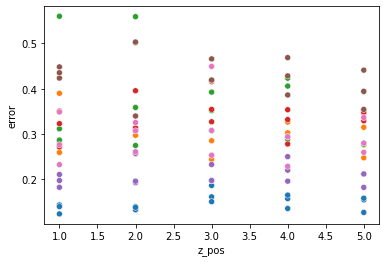

In [8]:
sns.scatterplot(data=df2, x='z_pos', y='error', hue='char', legend=False)

plt.show()

In [9]:
# Create a list of dataframes - one per build

builds = [(df2[df2['build'] == i]) for i in range(1,4)]

for i in range(3):
    print(builds[i].head())

                       char  build  z_pos     error
0  Cylindricity_Cyl_4mm_Pos      1      2  0.139702
1  Cylindricity_Cyl_4mm_Pos      1      3  0.161236
2  Cylindricity_Cyl_4mm_Pos      1      4  0.157326
3  Cylindricity_Cyl_4mm_Pos      1      5  0.154594
4  Cylindricity_Cyl_4mm_Pos      1      1  0.143345
                       char  build  z_pos     error
5  Cylindricity_Cyl_4mm_Pos      2      2  0.132615
6  Cylindricity_Cyl_4mm_Pos      2      3  0.186327
7  Cylindricity_Cyl_4mm_Pos      2      4  0.135503
8  Cylindricity_Cyl_4mm_Pos      2      5  0.126883
9  Cylindricity_Cyl_4mm_Pos      2      1  0.139695
                        char  build  z_pos     error
10  Cylindricity_Cyl_4mm_Pos      3      2  0.138130
11  Cylindricity_Cyl_4mm_Pos      3      3  0.150569
12  Cylindricity_Cyl_4mm_Pos      3      4  0.165138
13  Cylindricity_Cyl_4mm_Pos      3      5  0.158322
14  Cylindricity_Cyl_4mm_Pos      3      1  0.123571


In [10]:
gb = df2.groupby(['build', 'char'])

In [11]:
gb.head()

,char,build,z_pos,error
0,Cylindricity_Cyl_4mm_Pos,1,2,0.139702
1,Cylindricity_Cyl_4mm_Pos,1,3,0.161236
2,Cylindricity_Cyl_4mm_Pos,1,4,0.157326
3,Cylindricity_Cyl_4mm_Pos,1,5,0.154594
4,Cylindricity_Cyl_4mm_Pos,1,1,0.143345
5,Cylindricity_Cyl_4mm_Pos,2,2,0.132615
6,Cylindricity_Cyl_4mm_Pos,2,3,0.186327
7,Cylindricity_Cyl_4mm_Pos,2,4,0.135503
8,Cylindricity_Cyl_4mm_Pos,2,5,0.126883
9,Cylindricity_Cyl_4mm_Pos,2,1,0.139695


In [12]:
test = gb['error'].mean().tolist()

print(test)

[0.3457128639232206, 0.20371631107748467, 0.46496858269700675, 0.3353515471026593, 0.1512402471480115, 0.30917745026473675, 0.4254020737716876, 0.35554004292061736, 0.20747438605521218, 0.4250550210013153, 0.2954386738261391, 0.14420470579815947, 0.290763130367509, 0.3270908614969771, 0.30752353076507555, 0.21569760112156242, 0.39529337657635855, 0.2597366094729722, 0.14714618093163587, 0.2674760774821588, 0.35594245311627043]


---

## Cylindricity

---

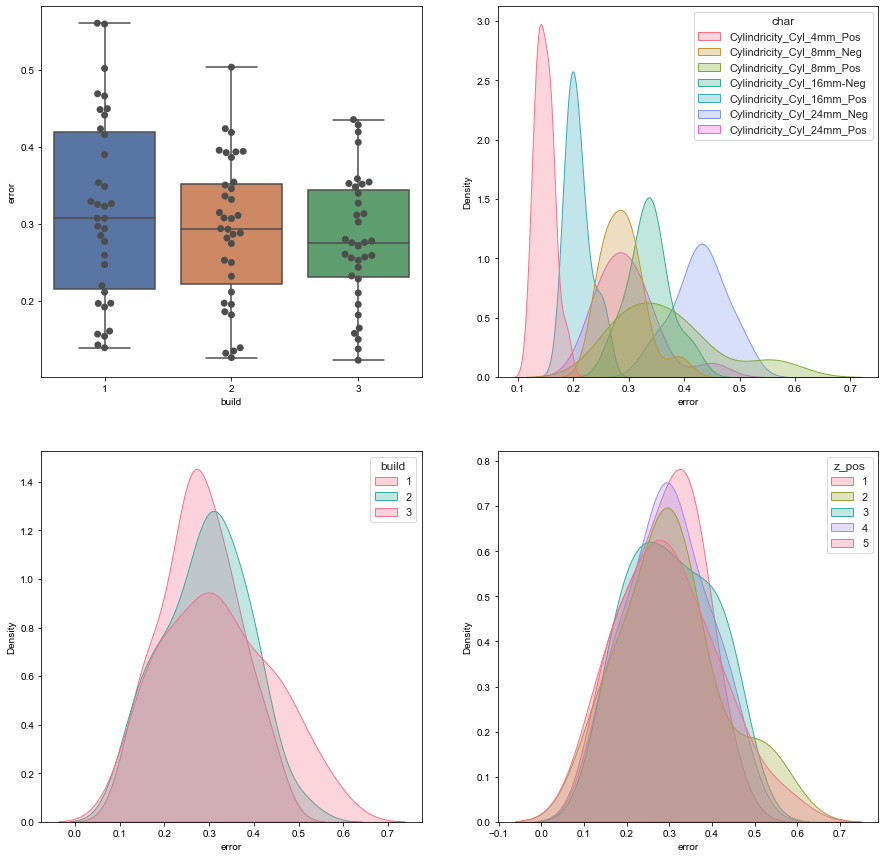

In [13]:
## Prepare data
# List of characteristics
chars = ['Cylindricity_Cyl_4mm_Pos',\
        'Cylindricity_Cyl_8mm_Neg',\
        'Cylindricity_Cyl_8mm_Pos',\
        'Cylindricity_Cyl_16mm-Neg',\
        'Cylindricity_Cyl_16mm_Pos',\
        'Cylindricity_Cyl_24mm_Neg',\
        'Cylindricity_Cyl_24mm_Pos']

# Insert a column with the name of the characteristic
for i in range(len(chars)):
    if 'char' not in char_dict[chars[i]].columns:
        char_dict[chars[i]].insert(2, 'char', chars[i])

# Retrieve the characteristics from the dictionary
df = pd.concat(char_dict[chars[i]] for i in range(len(chars)))

# Isolate anchors
df = df[(df['x_pos'] == 2) & (df['y_pos'] == 3)]

# Remove redundant columns and reset index
df = df.reset_index()[['char', 'build', 'z_pos', 'error']]


## Create figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15), sharey=False)

# Set a theme
sns.set_theme(style="whitegrid")


## Plot data
# 1st plot
sns.boxplot(ax=axes[0, 0], data=df, x='build', y='error')
sns.swarmplot(ax=axes[0, 0], data=df, x='build', y='error', color='.3', size=7)

# 2nd plot
sns.kdeplot(ax=axes[0, 1], data=df, x='error', hue='char', fill=True, alpha=.3, palette="husl")

#3rd plot
sns.kdeplot(ax=axes[1, 0], data=df, x='error', hue='build', fill=True, alpha=.3, palette="husl")

#4th plot
sns.kdeplot(ax=axes[1, 1], data=df, x='error', hue='z_pos', fill=True, alpha=.3, palette="husl")


# Display plot
plt.show()

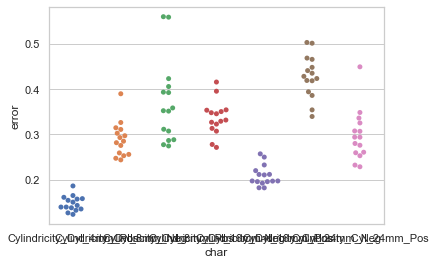

In [14]:
sns.swarmplot(data=df, y='error', x='char')


plt.show()

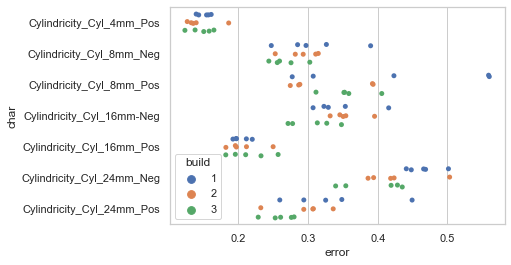

In [15]:
sns.stripplot(data=df, y='char', x='error', hue='build', dodge=True)


plt.show()

---

## Flatness

---

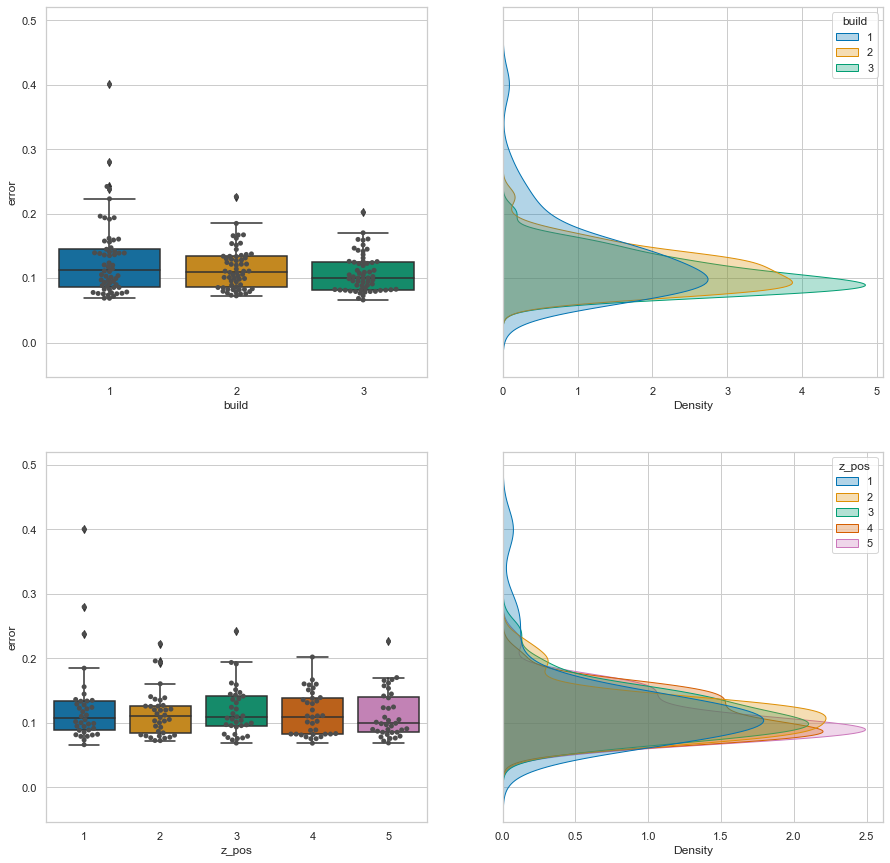

In [16]:
"""
Comparison of all planes of anchor specimen at position (2,3).

"""

## Prepare data
# List of characteristics
chars = ['Flatness_HX1_Plane1',
         'Flatness_HX1_Plane2',
         'Flatness_HX1_Plane3',
         'Flatness_HX1_Plane4',
         'Flatness_HX1_Plane5',
         'Flatness_HX1_Plane6',
         'Flatness_HX2_Plane1',
         'Flatness_HX2_Plane2',
         'Flatness_HX2_Plane3',
         'Flatness_HX2_Plane4',
         'Flatness_HX2_Plane5',
         'Flatness_HX2_Plane6']

# Insert a column with the name of the characteristic
for i in range(len(chars)):
    if 'char' not in char_dict[chars[i]].columns:
        char_dict[chars[i]].insert(2, 'char', chars[i])

# Retrieve the characteristics from the dictionary
df = pd.concat(char_dict[chars[i]] for i in range(len(chars)))

# Isolate anchors
df = df[(df['x_pos'] == 2) & (df['y_pos'] == 3)]

# Remove redundant columns and reset index
df = df.reset_index()[['char', 'build', 'z_pos', 'error']]


## Create figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15), sharey=True)

# Set a theme
sns.set_theme(style="whitegrid")


## Plot data
# 1st plot
sns.boxplot(ax=axes[0, 0], data=df, x='build', y='error', palette='colorblind')
sns.swarmplot(ax=axes[0, 0], data=df, x='build', y='error', color='.3')

# 2nd plot
sns.kdeplot(ax=axes[0, 1], data=df, y='error', hue='build', fill=True, alpha=.3, palette='colorblind')

#3rd plot
#sns.stripplot(ax=axes[1, 0], data=df, y='char', x='error', hue='build', palette='colorblind')
sns.boxplot(ax=axes[1, 0], data=df, x='z_pos', y='error', palette='colorblind')
sns.swarmplot(ax=axes[1, 0], data=df, x='z_pos', y='error', color='.3')

#4th plot
sns.kdeplot(ax=axes[1, 1], data=df, y='error', hue='z_pos', fill=True, alpha=.3, palette='colorblind')


# Display plot
plt.show()

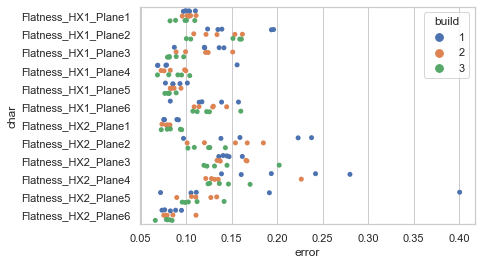

In [17]:
sns.stripplot(data=df, y='char', x='error', hue='build', dodge=True)

plt.show()

In [18]:
"""
T-test for anchors.

"""

## Prepare data
# List of characteristics
chars = ['Flatness_HX1_Plane1',
         'Flatness_HX1_Plane2',
         'Flatness_HX1_Plane3',
         'Flatness_HX1_Plane4',
         'Flatness_HX1_Plane5',
         'Flatness_HX1_Plane6',
         'Flatness_HX2_Plane1',
         'Flatness_HX2_Plane2',
         'Flatness_HX2_Plane3',
         'Flatness_HX2_Plane4',
         'Flatness_HX2_Plane5',
         'Flatness_HX2_Plane6']

# Insert a column with the name of the characteristic
for i in range(len(chars)):
    if 'char' not in char_dict[chars[i]].columns:
        char_dict[chars[i]].insert(2, 'char', chars[i])

# Retrieve the characteristics from the dictionary
df = pd.concat(char_dict[chars[i]] for i in range(len(chars)))

# Isolate anchors
df = df[(df['x_pos'] == 2) & (df['y_pos'] == 3)]

# Remove redundant columns and reset index
df = df.reset_index()[['char', 'build', 'z_pos', 'error']]


## Perform T-test
p_vals = func.get_p_vals(df, 'build')


p_vals

,1,2,3
1,NaN,0.108352,0.0153064
2,0.108352,NaN,0.215064
3,0.0153064,0.215064,NaN


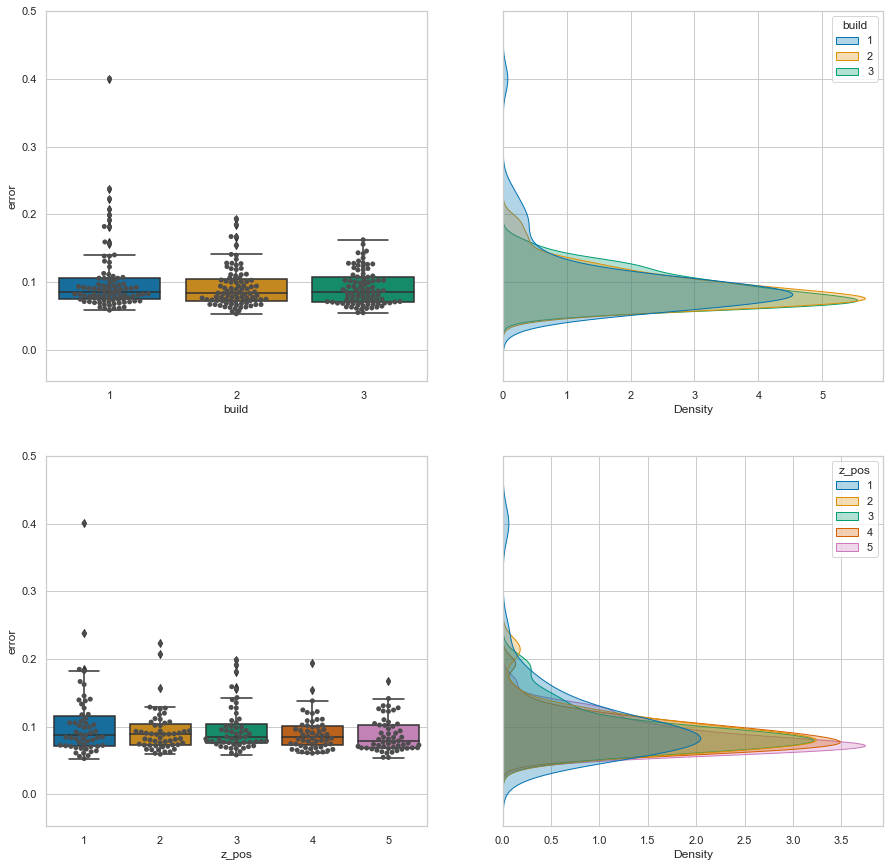

In [19]:
"""
Comparison of vertical planes of all positions

"""

## Prepare data
# List of characteristics
chars = ['Flatness_HX2_Plane2',
         'Flatness_HX2_Plane5']

# Insert a column with the name of the characteristic
for i in range(len(chars)):
    if 'char' not in char_dict[chars[i]].columns:
        char_dict[chars[i]].insert(2, 'char', chars[i])

# Retrieve the characteristics from the dictionary
df = pd.concat(char_dict[chars[i]] for i in range(len(chars)))

# Isolate anchors
#df = df[(df['x_pos'] == 2) & (df['y_pos'] == 3)]

# Remove redundant columns and reset index
df = df.reset_index()[['char', 'build', 'z_pos', 'error']]


## Create figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15), sharey=True)

# Set a theme
sns.set_theme(style="whitegrid")


## Plot data
# 1st plot
sns.boxplot(ax=axes[0, 0], data=df, x='build', y='error', palette='colorblind')
sns.swarmplot(ax=axes[0, 0], data=df, x='build', y='error', color='.3')

# 2nd plot
sns.kdeplot(ax=axes[0, 1], data=df, y='error', hue='build', fill=True, alpha=.3, palette='colorblind')

#3rd plot
#sns.stripplot(ax=axes[1, 0], data=df, y='char', x='error', hue='build', palette='colorblind')
sns.boxplot(ax=axes[1, 0], data=df, x='z_pos', y='error', palette='colorblind')
sns.swarmplot(ax=axes[1, 0], data=df, x='z_pos', y='error', color='.3')

#4th plot
sns.kdeplot(ax=axes[1, 1], data=df, y='error', hue='z_pos', fill=True, alpha=.3, palette='colorblind')


# Display plot
plt.show()


In [20]:
"""
T-test for vertical planes accross builds.

"""

## Prepare data
# List of characteristics
chars = ['Flatness_HX2_Plane2',
         'Flatness_HX2_Plane5']

# Insert a column with the name of the characteristic
for i in range(len(chars)):
    if 'char' not in char_dict[chars[i]].columns:
        char_dict[chars[i]].insert(2, 'char', chars[i])

# Retrieve the characteristics from the dictionary
df = pd.concat(char_dict[chars[i]] for i in range(len(chars)))

# Isolate anchors
#df = df[(df['x_pos'] == 2) & (df['y_pos'] == 3)]

# Remove redundant columns and reset index
df = df.reset_index()[['char', 'build', 'z_pos', 'error']]


## Perform T-test
p_vals = func.get_p_vals(df, 'build')


p_vals

,1,2,3
1,NaN,0.151317,0.108147
2,0.151317,NaN,0.849496
3,0.108147,0.849496,NaN
